#### Часть 2. Проверка гипотез методами математической статистики

В этой части группового проекта вам предстоит самим выбрать предметную область, а также самим получить датасет или датасеты, с которыми вы будете работать.

С точки зрения источников данных у вас есть две опции: вы можете найти ваш датасет — или 2-3 датасета в случае необходимости — на сайте [UCI Machine Learning Repository](https://archive.ics.uci.edu/) (брать датасеты необходимо именно с этого сайта); либо же вторая опция — можно собрать датасет/датасеты вручную с помощью средств Parsing'a и API. Допускается использование и комбинации этих двух опций. В любом случае, *каждый* используемый вами датасет должен (до этапа EDA) содержать **не менее 2000 строк** и **не менее 8 признаков**.




После получения датасетов вам следует:
- провести EDA с осмысленными визуализациями и качественным поиском первичных закономерностей;
- на основе проделенного EDA сформулировать **минимум три чёткие, содержательные гипотезы**;
- подобрать и реализовать **минимум три различных статистических теста** для проверки сформулированных раннее гипотез, причём каждый тест должен быть обязательно обоснован (различные статистические тесты в нашем случае означает, что статистические критерии для этих тестов должны быть разными);
- корректно и полно проинтерпретировать полученные результаты и сформулировать итоговые выводы.

**Важно:** вы должны очень ответственно подойти к выбору датасета, так как гипотезы должны быть *не случайными*, а логически вытекающими из осуществленного EDA и, кроме того, имеющими реальный интерес для изучения и проверки с точки зрения бизнес-составляющей. В случае если по одному датасету у вас не получается сформировать 3 достаточно осмысленных гипотезы — разрешается использовать суммарно вплоть до 3 датасетов. В таком случае, все эти датасеты должны иметь какую-то связь между собой.

In [236]:
from selenium import webdriver
import time
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import MoveTargetOutOfBoundsException, StaleElementReferenceException
from selenium.webdriver.common.actions.wheel_input import ScrollOrigin

In [38]:
df = pd.read_csv("df_mid-2.csv")

In [39]:
import requests

API_KEY = "982cfe1a-7f4a-416e-9aa7-81a7340e7f01"  # строка с ключом из кабинета
URL = "https://geocode-maps.yandex.ru/1.x/"

def get_coords(address: str):
    params = {
        "apikey": API_KEY,
        "geocode": address,
        "lang": "ru_RU",
        "format": "json",
        "results": 1,
    }
    r = requests.get(URL, params=params, timeout=10)
    if r.status_code != 200:
        return None, None

    data = r.json()
    try:
        member = data["response"]["GeoObjectCollection"]["featureMember"][0]
        pos = member["GeoObject"]["Point"]["pos"]  # строка "долгота широта"
        lon_str, lat_str = pos.split()
        return float(lat_str), float(lon_str)
    except (KeyError, IndexError, ValueError):
        return None, None

# df — твой датафрейм с колонкой 'address'
df["lat_lon"] = df["address"].apply(get_coords)
df["lat"] = df["lat_lon"].apply(lambda x: x[0])
df["lon"] = df["lat_lon"].apply(lambda x: x[1])
df = df.drop(columns=["lat_lon"])

In [42]:
df

,name,link,monWT,tueWT,wedWT,thuWT,friWT,satWT,sunWT,avgBill,...,menuPositions,reviewsAmount,cuisine,tablesAmount,phoneListed,reservationButton,categories,name_repeats,lat,lon
0,Al33 Пиццерия,https://yandex.ru/maps/org/al33_pitstseriya/17...,10:00–23:00,10:00–23:00,10:00–23:00,10:00–23:00,10:00–23:00,10:00–23:00,10:00–23:00,600-2000,...,114,699.0,"европейская, итальянская, авторская, морская, ...",26–38,True,False,"Пиццерия, Ресторан, Бар",1,55.787285,37.559936
1,Амбассадори-Трамплин,https://yandex.ru/maps/org/ambassadori_trampli...,12:00–00:00,12:00–00:00,12:00–00:00,12:00–00:00,12:00–00:00,12:00–00:00,12:00–00:00,2500,...,45,1028.0,"европейская, итальянская, паназиатская, авторс...",1–50,True,False,"Ресторан, Банкетный зал",1,55.708511,37.544827
2,Amphora,https://yandex.ru/maps/org/amphora/128434812078/,Выходной,18:00–05:00,18:00–05:00,18:00–05:00,18:00–05:00,18:00–05:00,18:00–05:00,2500-10000,...,0,58.0,"европейская, паназиатская, русская, японская, ...",до 10,True,True,"Ресторан, Кальян-бар, Бар",1,55.739732,37.605508
3,АндерСон,https://yandex.ru/maps/org/anderson/104269030501/,09:00–22:00,09:00–22:00,09:00–22:00,09:00–22:00,09:00–22:00,09:00–23:00,09:00–23:00,1500-2500,...,4,2982.0,"европейская, итальянская, русская, авторская, ...",от 40,True,False,"Кафе, Кондитерская, Ресторан",7,55.734917,37.584820
4,АндерСон,https://yandex.ru/maps/org/anderson/1686677393/,10:00–22:00,10:00–22:00,10:00–22:00,10:00–22:00,10:00–22:00,10:00–22:00,10:00–22:00,1500-2000,...,153,1313.0,"европейская, русская, авторская, домашняя, вег...",15,True,False,"Кафе, Кондитерская, Ресторан",7,55.744313,37.794352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3442,Москвичи,https://yandex.ru/maps/org/moskvichi/222953319...,11:00–00:00,11:00–00:00,11:00–00:00,11:00–00:00,11:00–02:00,11:00–02:00,11:00–00:00,NaN,...,9,803.0,"европейская, американская, итальянская, русска...",50–60,True,False,"Ресторан, Банкетный зал",1,55.738181,37.829242
3443,Мята Lounge,https://yandex.ru/maps/org/myata_lounge/107535...,14:00–02:00,14:00–02:00,14:00–02:00,14:00–02:00,14:00–03:00,14:00–03:00,14:00–02:00,NaN,...,44,406.0,еврейская,NaN,True,True,"Кальян-бар, Ресторан, Бар",15,55.748255,37.776251
3444,Pronto Pizza,https://yandex.ru/maps/org/pronto_pizza/116886...,11:00–00:00,11:00–00:00,11:00–00:00,11:00–00:00,11:00–00:00,11:00–00:00,11:00–00:00,700-1200,...,185,606.0,"европейская, итальянская, русская, японская",1–35,True,False,"Пиццерия, Доставка еды и обедов, Ресторан, Кафе",1,55.720403,37.822137
3445,Дунька,https://yandex.ru/maps/org/dunka/13350056854/,Круглосуточно,Круглосуточно,Круглосуточно,Круглосуточно,Круглосуточно,Круглосуточно,Круглосуточно,500-800,...,75,46.0,"итальянская, европейская, шашлык, дагестанская...",16–20,True,False,"Ресторан, Быстрое питание",1,55.789254,37.538080


In [44]:
df.to_csv("shirotadolgotaRESTORANI.csv", index=False, encoding="utf-8")

In [45]:
import re
import pandas as pd  # можно не импортить, если не будешь работать с NaN

def parse_avg_check(value):
    """
    Преобразует строку со средним чеком в одно число.
    Примеры:
    '2000'        -> 2000
    '1500-3000'   -> 2250
    '1 500–2 500 ₽' -> 2000
    NaN/пусто     -> None
    """
    # если это NaN из pandas
    if isinstance(value, float) and pd.isna(value):
        return None

    s = str(value).strip()
    if s == "":
        return None

    # убираем пробелы и неразрывные пробелы
    s = s.replace(" ", "").replace("\u00a0", "")

    # нормализуем разные виды тире
    s = s.replace("–", "-").replace("—", "-")

    # режем по тире
    parts = s.split("-")

    # вытаскиваем числа из каждой части
    nums = []
    for p in parts:
        match = re.search(r"\d+", p)
        if match:
            nums.append(int(match.group()))

    if not nums:
        return None

    if len(nums) == 1:
        # одно число — просто возвращаем его
        return nums[0]

    # диапазон — берём середину (целое)
    return int(sum(nums) / len(nums))

In [74]:
df = pd.read_csv("shirotadolgotaRESTORANI.csv")
df["avg_check_num"] = df["avgBill"].apply(parse_avg_check)
df = df[df["avg_check_num"] < 10000]


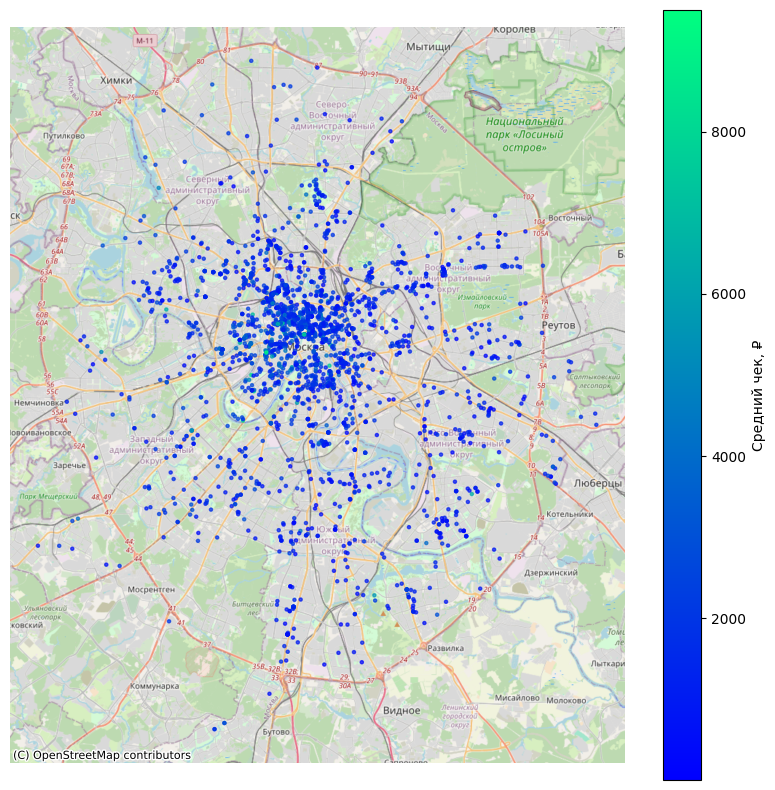

In [ ]:
import pandas as pd
import folium
from branca.colormap import linear

# 1. Читаем данные
df = pd.read_csv('processedRestaurants.csv')

# оставляем только с валидными координатами и чеком
df = df.dropna(subset=['lat', 'lon', 'avg_check_num']).copy()
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df['avg_check_num'] = df['avg_check_num'].astype(float)

# 2. Центр карты — по средним координатам
center_lat = df['lat'].mean()
center_lon = df['lon'].mean()

# 3. Создаём карту
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=11,
    tiles='OpenStreetMap'
)

# 4. Цветовая шкала по среднему чеку (обрежем по квантилям, чтобы не убивали выбросы)
vmin = df['avg_check_num'].quantile(0.05)
vmax = df['avg_check_num'].quantile(0.95)

colormap = linear.Viridis_09.scale(vmin, vmax)
colormap.caption = 'Средний чек, ₽'
colormap.add_to(m)

# 5. Добавляем точки ресторанов
for _, row in df.iterrows():
    value = row['avg_check_num']
    color = colormap(value)

    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"{row.get('name', 'Ресторан')} — {int(value)} ₽"
    ).add_to(m)

# 6. В Jupyter просто выводим объект m — карта интерактивная
m

# 7. Если хочешь сохранить в файл:
m.save('moscow_restaurants_map.html')

In [77]:
import pandas as pd
import folium
from branca.colormap import linear

# 1. Читаем данные

df = df.dropna(subset=['lat', 'lon', 'avg_check_num']).copy()
df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)
df['avg_check_num'] = df['avg_check_num'].astype(float)

# 2. Центр карты
center_lat = df['lat'].mean()
center_lon = df['lon'].mean()

# 3. Карта
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=11,
    tiles='OpenStreetMap'
)

# 4. Цветовая шкала
vmin = df['avg_check_num'].quantile(0.05)
vmax = df['avg_check_num'].quantile(0.95)

# главное изменение — вот тут:
colormap = linear.viridis.scale(vmin, vmax)
colormap.caption = 'Средний чек, ₽'
colormap.add_to(m)

# 5. Точки
for _, row in df.iterrows():
    value = row['avg_check_num']
    color = colormap(value)

    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"{row.get('name', 'Ресторан')} — {int(value)} ₽"
    ).add_to(m)

# 6. Показать карту в ноутбуке
m

# 7. Сохранить в файл
m.save('moscow_restaurants_map.html')